# Supervised Learning – Linear Regression in Practice

In [36]:
%pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
data = pd.read_csv("student_scores.csv")
print(data.head(10))

     name  hours  score gender grades class
0   Aarav      8     76      M      A    9A
1    Riya      5     62      F      B    9B
2   Kabir     10     88      M      A   10A
3    Sana      4     55      F      C    9A
4  Vivaan      7     72      M      B   10B
5  Ishita      6     64      F      B    9C
6   Rohan      3     48      M      D    9B
7   Meera      9     90      F      A   11A
8  Aditya      2     38      M      F    9C
9   Kavya     11     93      F      A   12A


In [38]:
# Inspect columns and basic info
print('Columns:', data.columns.tolist())

#1.Dataset Basic Info
print('\nDataset Info:')
print(data.info())


#2.Completeness: Check for missing values:
#Checks if any column has missing/null values.
print('\nDataset Completeness:')
print(data.isnull().sum())


#3.Dataset Consistency: All numeric columns should be numeric.
print('\nDataset Consistency:')
print(data.dtypes)    

Columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None

Dataset Completeness:
name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

Dataset Consistency:
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


In [39]:
#3.Dataset Consistency: All numeric columns should be numeric.
print('\nDataset Consistency:')
print(data.dtypes)


Dataset Consistency:
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object



Dataset Describe:
           hours      score
count  92.000000  92.000000
mean    6.510870  68.836957
std     2.265336  15.692286
min     2.000000  35.000000
25%     5.000000  57.000000
50%     7.000000  70.000000
75%     8.000000  82.000000
max    11.000000  94.000000

Dataset Time-Keeping:

No timestamps

Dataset Bias
gender
F    51.086957
M    48.913043
Name: proportion, dtype: float64
grades
B    35.869565
A    32.608696
C    19.565217
D     8.695652
F     3.260870
Name: proportion, dtype: float64
class
9A     14.130435
10A    11.956522
9B     10.869565
9C     10.869565
10B     8.695652
11A     8.695652
10C     7.608696
12A     6.521739
12B     6.521739
11B     5.434783
12C     5.434783
11C     3.260870
Name: proportion, dtype: float64


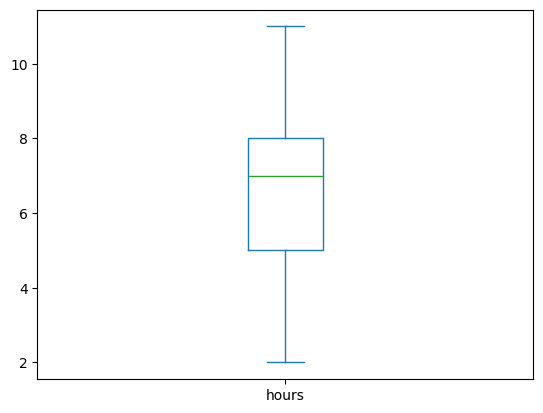

In [40]:
#4.Accuracy: Values realistic or outlier
print('\nDataset Describe:')
print(data.describe()) # Summary stats

data['hours'].plot(kind='box')

#5.TIME-KEEPING — Is the data up-to-date?
print('\nDataset Time-Keeping:')
print('\nNo timestamps')

#6.BIAS Check — Is data skewed toward 1 user group?
print('\nDataset Bias')
print(data['gender'].value_counts(normalize=True)*100)
print(data['grades'].value_counts(normalize=True)*100)
print(data['class'].value_counts(normalize=True)*100)

In [41]:
print(data['class'].value_counts(normalize=True)*100)

class
9A     14.130435
10A    11.956522
9B     10.869565
9C     10.869565
10B     8.695652
11A     8.695652
10C     7.608696
12A     6.521739
12B     6.521739
11B     5.434783
12C     5.434783
11C     3.260870
Name: proportion, dtype: float64


In [42]:
categorical = data.select_dtypes(include='object').columns
numerical = data.select_dtypes(exclude='object').columns

print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))

# Encode class column
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data["class_encoded"] = le.fit_transform(data["grades"])

X = data[["hours"]]
y = data["score"]

Categorical Features: ['name', 'gender', 'grades', 'class']
Numerical Features: ['hours', 'score']


In [54]:
import pandas as pd
data = { "Hours": [1, 2, 3, 4, 5, 6, 7, 8], 
"Score": [35, 42, 51, 60, 68, 77, 85, 90] }
df = pd.DataFrame(data)
print(" Dataset Loaded Successfully!\n")
print(df)

 Dataset Loaded Successfully!

   Hours  Score
0      1     35
1      2     42
2      3     51
3      4     60
4      5     68
5      6     77
6      7     85
7      8     90


In [ ]:
import numpy as np

X = data["Hours"]
y = data["Score"]

X = np.array(X).reshape(-1, 1)   # 👈 FIX IS HERE
y = np.array(y)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    # stratify=y
)

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 


print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

Model Coefficient (Slope): 8.03
Model Intercept: 27.359999999999992


In [70]:
y_pred = model.predict(X_test)
pred_data = {'Y_prediction': y_pred.round(2),
             'Y_test': y_test}

prediction_table = pd.DataFrame(pred_data)
prediction_table


,Y_prediction,Y_test
0,43.42,42
1,75.54,77


In [84]:
x = data['Hours']
user_data = float(input("Enter study hours: "))
new_input = pd.DataFrame([[user_data]], columns=['Hours'])
print(model.predict(new_input))

[35.39]


c:\Users\ITCS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [77]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")


MSE  : 2.07
RMSE : 1.44
R²   : 0.993
